In [6]:
import librosa
import os
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from glob import glob
from sklearn import preprocessing

In [2]:
os.chdir("C:\\Users\Alec\Desktop\SIT_acoustic\ESCAPE_FORMAT_ONECHANNEL\ESCAPE_II_ONECHANNEL_PROCESSED")

test normalization techniques

In [11]:
y, sr = librosa.load("C:\\Users\Alec\Desktop\SIT_acoustic\ESCAPE_FORMAT_ONECHANNEL\ESCAPE_II_ONECHANNEL\sA3r03\p04\d306\d306sA3r03p0420210827.wav", sr=44100)

In [18]:
print(normalized.shape)
print(y.shape)

(5292001,)
(5292001,)


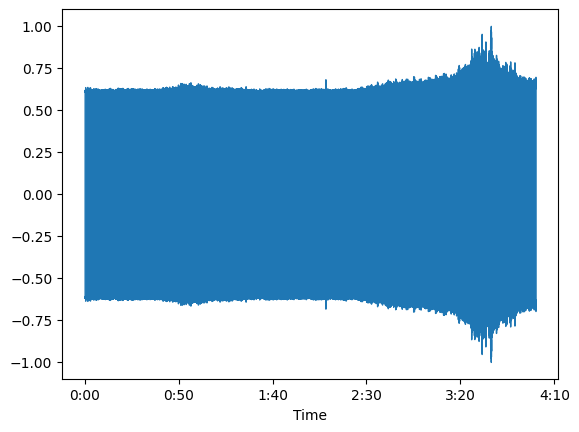

In [20]:
normalized = (y-min(y))/(max(y)-min(y))
librosa.display.waveshow(normalized)
sf.write('C:\\Users\Alec\Desktop\\featureExtraction.wav', normalized, sr)

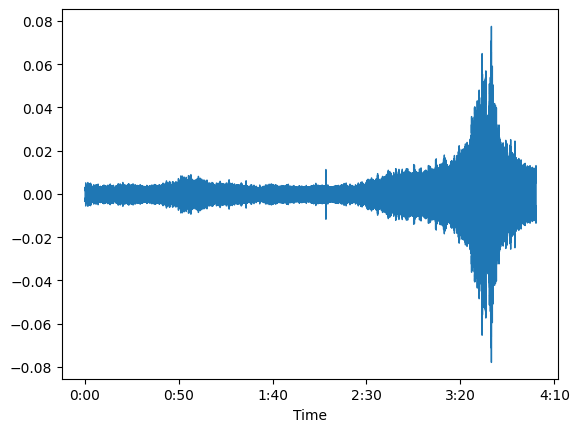

In [12]:
librosa.display.waveshow(y)

In [57]:
signal = glob('d308sA3r04p04*')
signal = signal[:-1]

In [26]:
time_axis

array([0.00000000e+00, 1.13657890e-02, 2.27315780e-02, ...,
       5.99772684e+01, 5.99886342e+01, 6.00000000e+01])

In [74]:
%matplotlib tk
# Initialize variables
spectrograms = []
cumulative_width = 0
time_intervals = []

# Iterate through WAV files
for wav_file in signal[240:250]:
    # Load audio file
    y, sr = librosa.load(wav_file, sr=44100)

    # Compute spectrogram
    spectrogram = np.abs(librosa.stft(y))

    # Append to list of spectrograms
    spectrograms.append(spectrogram)

    # Calculate duration in seconds
    duration = librosa.get_duration(y=y, sr=sr)
    cumulative_width += duration

# Stack spectrograms horizontally
stacked_spectrogram = np.hstack(spectrograms)

# Plotting
plt.figure(figsize=(20, 10))

# Determine x-axis positions
time_axis = np.linspace(0, cumulative_width, stacked_spectrogram.shape[1])

# Display spectrogram
librosa.display.specshow(librosa.amplitude_to_db(stacked_spectrogram, ref=np.max), sr=sr, x_axis='time', x_coords=time_axis)

# Add colorbar
plt.colorbar()

# Calculate x-axis ticks every 0.25 seconds
xticks = np.arange(0, cumulative_width + 0.25, 0.25)

# Add vertical lines at xticks
for tick in xticks:
    plt.axvline(x=tick, color='b', linestyle='--')

# Set xticks and labels
plt.xticks(xticks)
plt.xlabel('Time (seconds)')

# Set title and adjust layout
plt.title('Stacked Spectrograms of all WAV files')
plt.tight_layout()

plt.show()

In [71]:
%matplotlib tk
mfccs = []
cumulative_width = 0
time_intervals = []
# Iterate through WAV files
for wav_file in signal[240:250]:
    # Load audio file
    y, sr = librosa.load(wav_file, sr=44100)

    # Compute spectrogram
    mfcc = librosa.feature.mfcc(y=y, sr=sr)

    mfccs.append(mfcc)

    duration = librosa.get_duration(y=y, sr=sr)
    time_intervals.append(cumulative_width + duration / 2)
    cumulative_width += duration
    
# Stack spectrograms horizontally
stacked_mfcc = np.hstack(mfccs)

time_axis = np.linspace(0, cumulative_width, stacked_mfcc.shape[1])

plt.figure(figsize=(14, 10))  # Set the figure width to cumulative duration
librosa.display.specshow(stacked_mfcc, sr=sr, x_axis='time', x_coords=time_axis)
plt.colorbar()

xticks = np.arange(0, cumulative_width + 0.25, 0.25)
for tick in xticks:
    plt.axvline(x=tick, color='black', linestyle='--')

plt.xticks(xticks)
plt.title('Stacked MFCCs of all WAV files')
plt.tight_layout()

plt.show()

In [80]:
%matplotlib tk
mfccs = []
cumulative_width = 0
time_intervals = []
# Iterate through WAV files
for wav_file in signal[240:245]:
    # Load audio file
    y, sr = librosa.load(wav_file, sr=44100)

    # Compute spectrogram
    mfcc = librosa.feature.chroma_stft(y=y, sr=sr)

    mfccs.append(mfcc)

    duration = librosa.get_duration(y=y, sr=sr)
    time_intervals.append(cumulative_width + duration / 2)
    cumulative_width += duration
    
# Stack spectrograms horizontally
stacked_mfcc = np.hstack(mfccs)

time_axis = np.linspace(0, cumulative_width, stacked_mfcc.shape[1])

plt.figure(figsize=(14, 10))  # Set the figure width to cumulative duration
librosa.display.specshow(stacked_mfcc, sr=sr, x_axis='time', x_coords=time_axis)
plt.colorbar()

xticks = np.arange(0, cumulative_width + 0.25, 0.25)
for tick in xticks:
    plt.axvline(x=tick, color='black', linestyle='--')

plt.xticks(xticks)
plt.title('Stacked MFCCs of all WAV files')
plt.tight_layout()

plt.show()

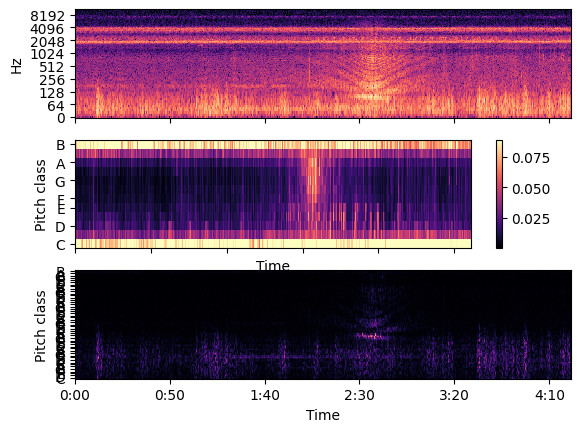

In [170]:
%matplotlib inline
y, sr = librosa.load("C:\\Users\Alec\Desktop\SIT_acoustic\ESCAPE_FORMAT_ONECHANNEL\ESCAPE_II_ONECHANNEL\sA3r04\p02\d306\d306sA3r04p0220210827.wav", sr=48000)
S = np.abs(librosa.stft(y))

chroma = librosa.feature.chroma_stft(S=S, sr=sr)
cqt = np.abs(librosa.cqt(y, sr=sr))

fig, ax = plt.subplots(nrows=3, sharex=True)

img = librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),

                               y_axis='log', x_axis='time', ax=ax[0])

ax[0].label_outer()

img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax[1])

img = librosa.display.specshow(cqt, y_axis='chroma', x_axis='time', ax=ax[2])

fig.colorbar(img, ax=[ax[1]])

In [132]:
cent[0].shape

(11251,)

[Text(0.5, 1.0, 'log Power spectrogram')]

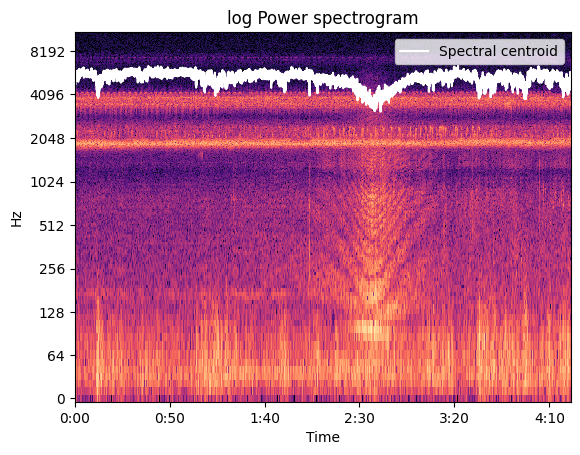

In [137]:
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
S, phase = librosa.magphase(librosa.stft(y=y))

times = librosa.times_like(cent)

fig, ax = plt.subplots()

librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),

                         y_axis='log', x_axis='time', ax=ax)

ax.plot(times, cent.T, label='Spectral centroid', color='w')

ax.legend(loc='upper right')

ax.set(title='log Power spectrogram')

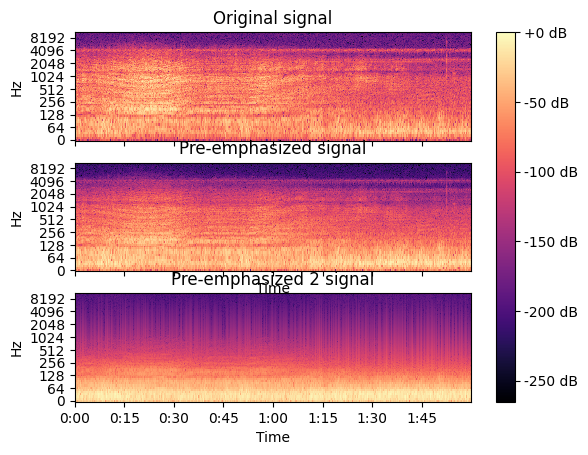

In [196]:
y, sr = librosa.load("C:\\Users\Alec\Desktop\SIT_acoustic\ESCAPE_FORMAT_ONECHANNEL\ESCAPE_II_ONECHANNEL\sA2r22\p02\d306\d306sA2r22p0220210825.wav", sr=44100)

y_filt = librosa.effects.deemphasis(y, coef=0.99)

y_filt2 = librosa.effects.deemphasis(y_filt, coef=0.99)

y_filt3 = librosa.effects.deemphasis(y_filt2, coef=0.99)
y_filt4 = librosa.effects.deemphasis(y_filt3, coef=0.99)
y_filt5 = librosa.effects.deemphasis(y_filt4, coef=0.99)

# and plot the results for comparison

S_orig = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max, top_db=None)

S_preemph = librosa.amplitude_to_db(np.abs(librosa.stft(y_filt)), ref=np.max, top_db=None)

S_deemph = librosa.amplitude_to_db(np.abs(librosa.stft(y_filt5)), ref=np.max, top_db=None)

fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True)

librosa.display.specshow(S_orig, y_axis='log', x_axis='time', ax=ax[0])

ax[0].set(title='Original signal')

ax[0].label_outer()

img = librosa.display.specshow(S_preemph, y_axis='log', x_axis='time', ax=ax[1])

ax[1].set(title='Pre-emphasized signal')

img = librosa.display.specshow(S_deemph, y_axis='log', x_axis='time', ax=ax[2])

ax[2].set(title='Pre-emphasized 2 signal')

fig.colorbar(img, ax=ax, format="%+2.f dB")

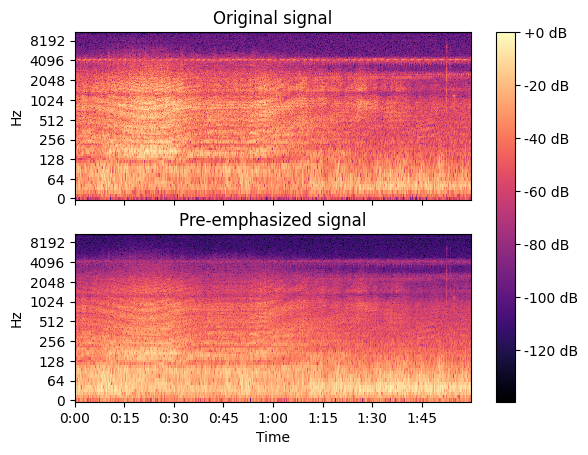

In [188]:
y, sr = librosa.load("C:\\Users\Alec\Desktop\SIT_acoustic\ESCAPE_FORMAT_ONECHANNEL\ESCAPE_II_ONECHANNEL\sA2r22\p02\d306\d306sA2r22p0220210825.wav", sr=44100)

y_filt = librosa.effects.deemphasis(y, coef=0.99)

# and plot the results for comparison

S_orig = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max, top_db=None)

S_preemph = librosa.amplitude_to_db(np.abs(librosa.stft(y_filt)), ref=np.max, top_db=None)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)

librosa.display.specshow(S_orig, y_axis='log', x_axis='time', ax=ax[0])

ax[0].set(title='Original signal')

ax[0].label_outer()

img = librosa.display.specshow(S_preemph, y_axis='log', x_axis='time', ax=ax[1])

ax[1].set(title='Pre-emphasized signal')

fig.colorbar(img, ax=ax, format="%+2.f dB")